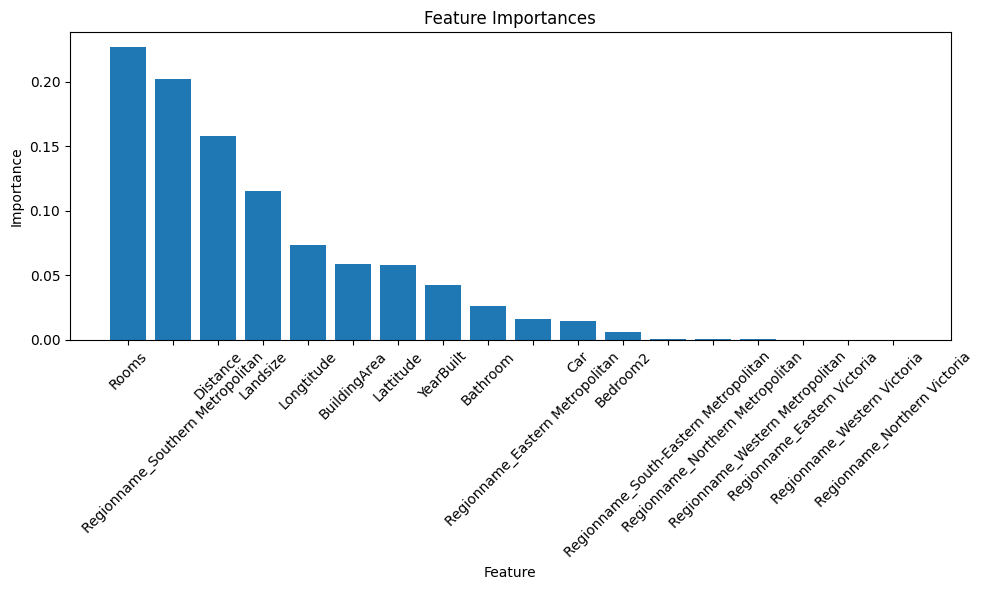

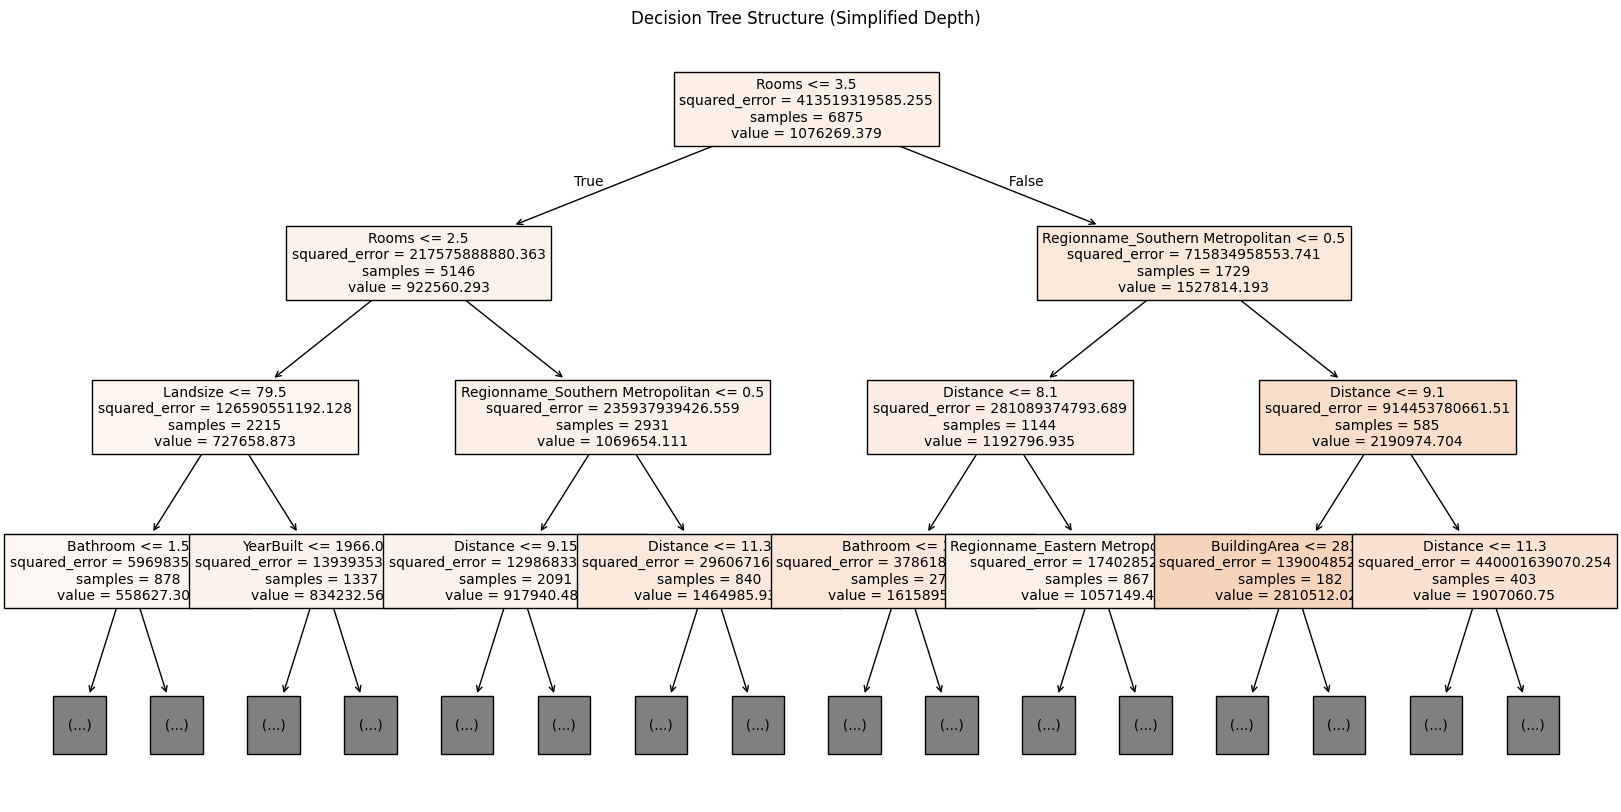

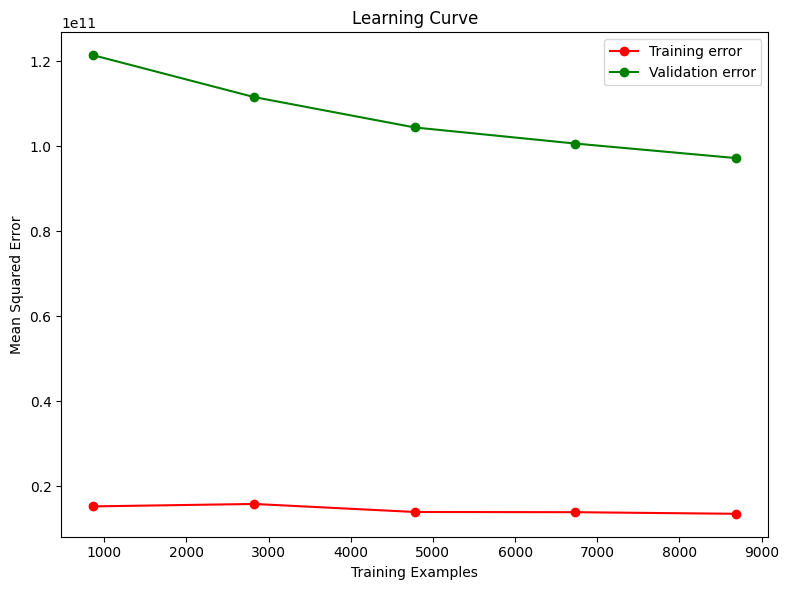

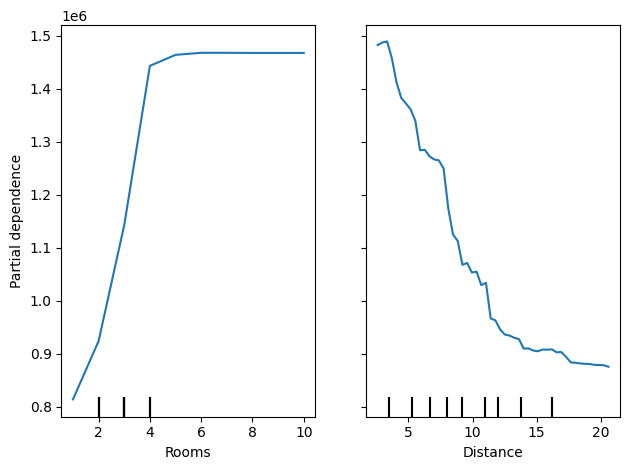

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import plot_tree
from sklearn.inspection import PartialDependenceDisplay
import shap

# Load dataset
data = pd.read_csv('melb_data.csv')

# Define features and target
features = ['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
            'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Regionname']
X = data[features]
y = data['Price']

# Preprocessing pipeline
categorical_features = ['Regionname']
numerical_features = [col for col in features if col not in categorical_features]

numerical_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42, n_estimators=100))
])

# Train-test split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=42)

# Fit model
model.fit(X_train, y_train)

# Step 1: Feature Importance
importances = model.named_steps['model'].feature_importances_
feature_names = numerical_features + list(model.named_steps['preprocessor']
                                          .named_transformers_['cat']
                                          .named_steps['onehot']
                                          .get_feature_names_out(categorical_features))
plt.figure(figsize=(10, 6))
indices = np.argsort(importances)[::-1]
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), np.array(feature_names)[indices], rotation=45)
plt.title("Feature Importances")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()
print
# Step 2: Visualize Structure of a Single Decision Tree
tree = model.named_steps['model'].estimators_[0]
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=feature_names, filled=True, max_depth=3, fontsize=10)
plt.title("Decision Tree Structure (Simplified Depth)")
plt.show()

# Step 3: Learning Curve
train_sizes, train_scores, valid_scores = learning_curve(
    model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 5), scoring='neg_mean_squared_error', cv=5)
train_scores_mean = -train_scores.mean(axis=1)
valid_scores_mean = -valid_scores.mean(axis=1)
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training error")
plt.plot(train_sizes, valid_scores_mean, 'o-', color="g", label="Validation error")
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Mean Squared Error")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

# Step 4: Partial Dependence Plot
PartialDependenceDisplay.from_estimator(model, X_train, ['Rooms', 'Distance'], grid_resolution=50, kind="average")
plt.tight_layout()
plt.show()

# Step 5: SHAP Values
# Transform validation data through the preprocessor
X_valid_transformed = model.named_steps['preprocessor'].transform(X_valid)

# SHAP Explanation
explainer = shap.TreeExplainer(model.named_steps['model'])
shap_values = explainer.shap_values(X_valid_transformed)

# SHAP Summary Plot
shap.summary_plot(shap_values, X_valid_transformed, feature_names=feature_names)


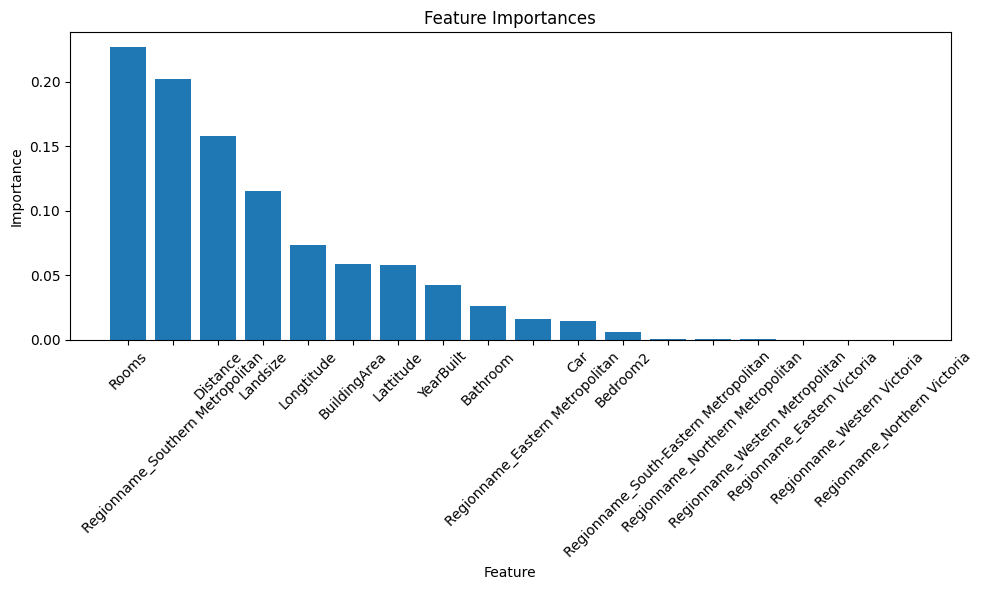

Feature Importance: Menampilkan kontribusi masing-masing fitur terhadap prediksi.


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import plot_tree
from sklearn.inspection import PartialDependenceDisplay
import shap

# Load dataset
data = pd.read_csv('melb_data.csv')

# Define features and target
features = ['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
            'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Regionname']
X = data[features]
y = data['Price']

# Preprocessing pipeline
categorical_features = ['Regionname']
numerical_features = [col for col in features if col not in categorical_features]

numerical_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42, n_estimators=100))
])

# Train-test split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=42)

# Fit model
model.fit(X_train, y_train)

# Step 1: Feature Importance
importances = model.named_steps['model'].feature_importances_
feature_names = numerical_features + list(model.named_steps['preprocessor']
                                          .named_transformers_['cat']
                                          .named_steps['onehot']
                                          .get_feature_names_out(categorical_features))
plt.figure(figsize=(10, 6))
indices = np.argsort(importances)[::-1]
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), np.array(feature_names)[indices], rotation=45)
plt.title("Feature Importances")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()
print('Feature Importance: Menampilkan kontribusi masing-masing fitur terhadap prediksi.')

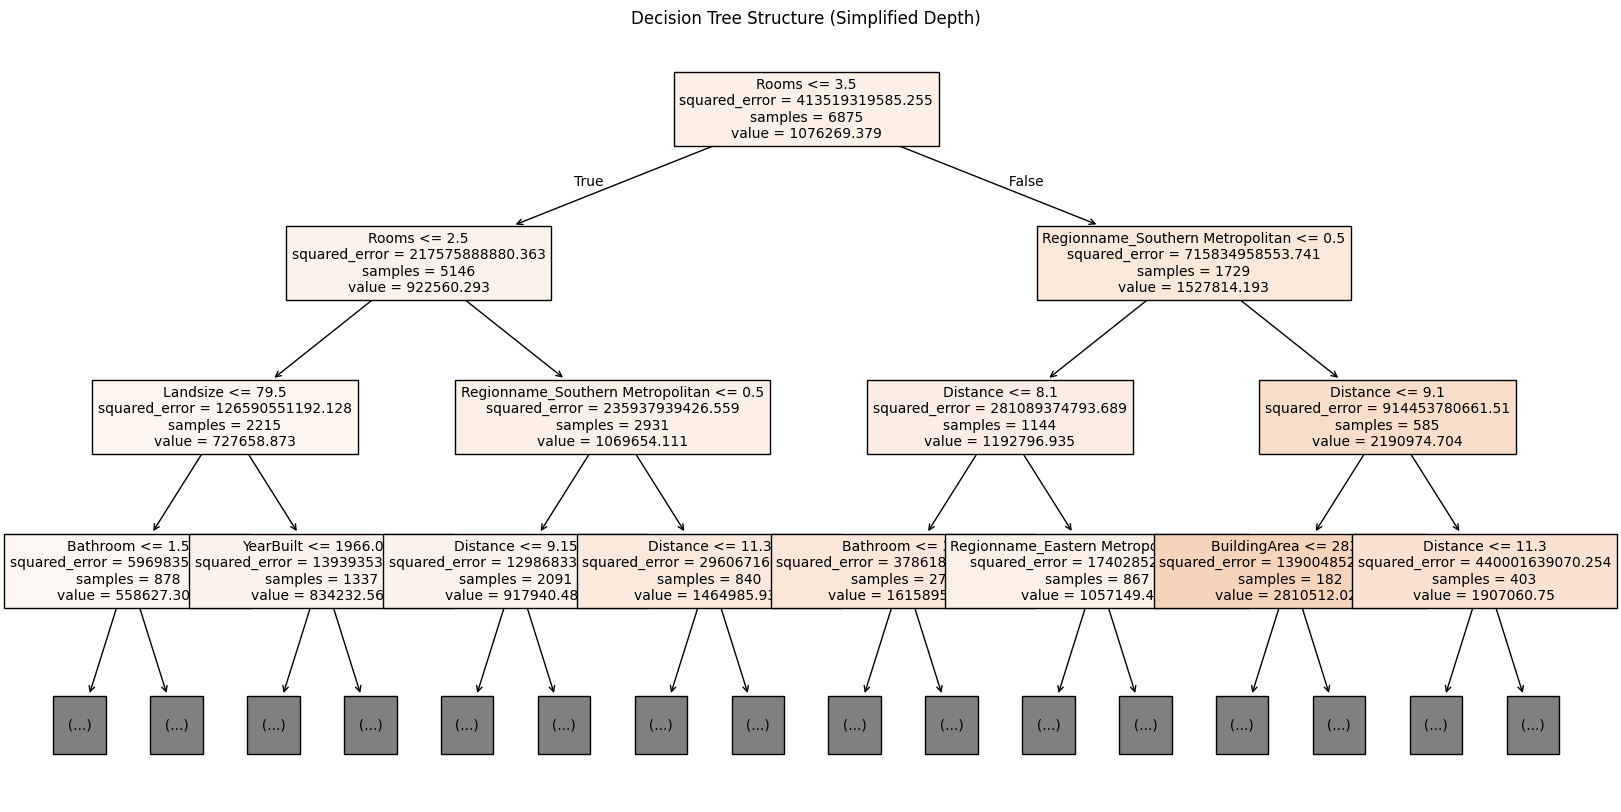

Visualisasi Struktur Pohon: Menampilkan pohon keputusan sederhana dari model.


In [3]:
# Step 2: Visualize Structure of a Single Decision Tree
tree = model.named_steps['model'].estimators_[0]
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=feature_names, filled=True, max_depth=3, fontsize=10)
plt.title("Decision Tree Structure (Simplified Depth)")
plt.show()
print('Visualisasi Struktur Pohon: Menampilkan pohon keputusan sederhana dari model.')

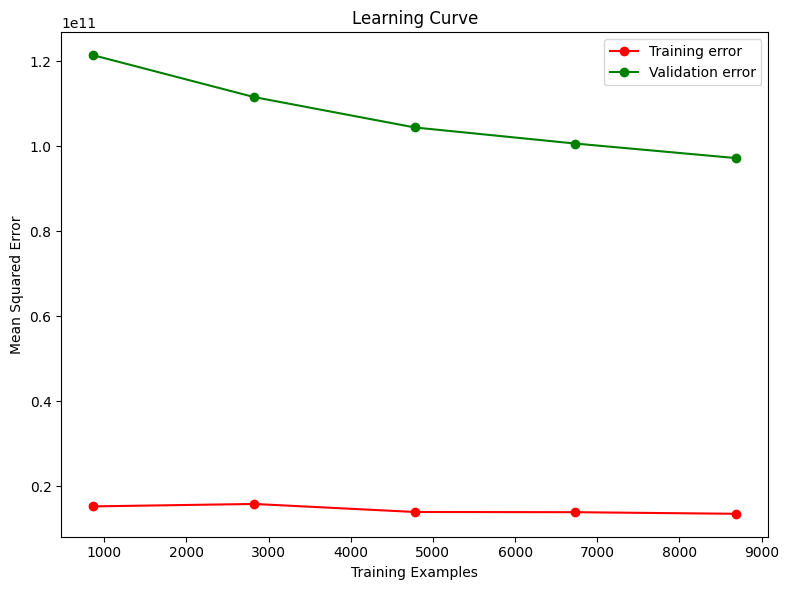

Learning Curve: Menunjukkan performa model dengan variasi jumlah data pelatihan.


In [4]:
# Step 3: Learning Curve
train_sizes, train_scores, valid_scores = learning_curve(
    model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 5), scoring='neg_mean_squared_error', cv=5)
train_scores_mean = -train_scores.mean(axis=1)
valid_scores_mean = -valid_scores.mean(axis=1)
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training error")
plt.plot(train_sizes, valid_scores_mean, 'o-', color="g", label="Validation error")
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Mean Squared Error")
plt.legend(loc="best")
plt.tight_layout()
plt.show()
print('Learning Curve: Menunjukkan performa model dengan variasi jumlah data pelatihan.')

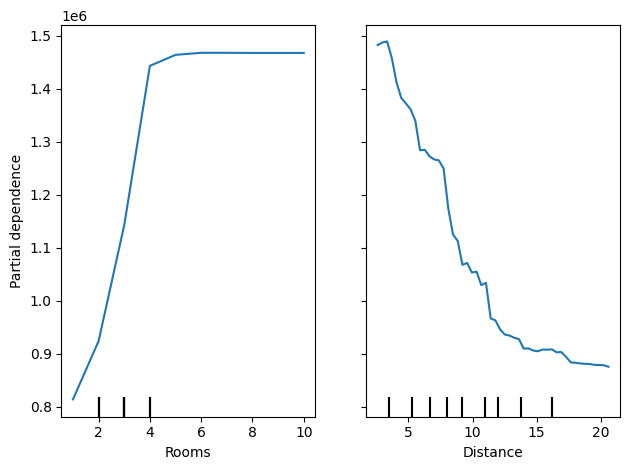

Partial Dependence Plot: Hubungan fitur dengan target prediksi.


In [5]:
# Step 4: Partial Dependence Plot
PartialDependenceDisplay.from_estimator(model, X_train, ['Rooms', 'Distance'], grid_resolution=50, kind="average")
plt.tight_layout()
plt.show()
print('Partial Dependence Plot: Hubungan fitur dengan target prediksi.')

In [ ]:
# Step 5: SHAP Values
# Transform validation data through the preprocessor
X_valid_transformed = model.named_steps['preprocessor'].transform(X_valid)

# SHAP Explanation
explainer = shap.TreeExplainer(model.named_steps['model'])
shap_values = explainer.shap_values(X_valid_transformed)

# SHAP Summary Plot
shap.summary_plot(shap_values, X_valid_transformed, feature_names=feature_names)
print('SHAP Values: Interpretasi global dan lokal dari prediksi model.')